In [29]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from web_scraper import web_scraper

How it works:
compute distribution of 100 things
plot it
find std deviation
bam standardize it!

In [30]:
df, ticker = web_scraper()

c:\Users\richa\OneDrive\Desktop\Coding\Stock-Sentiment-Analyzer\web_scraper.py:19: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 19 of the file c:\Users\richa\OneDrive\Desktop\Coding\Stock-Sentiment-Analyzer\web_scraper.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  html = BeautifulSoup(response, 'html')


In [31]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [32]:
print(df.head())

  ticker        date     time  \
0   TSLA  2024-03-15  10:11AM   
1   TSLA  2024-03-15  10:06AM   
2   TSLA  2024-03-15  09:53AM   
3   TSLA  2024-03-15  09:47AM   
4   TSLA  2024-03-15  09:30AM   

                                               title  
0  Magnificent Seven Stocks To Buy And Watch: App...  
1  Japanese Automakers Honda, Nissan Explore EV P...  
2  Top analyst faces harsh criticism about his st...  
3  Fisker Jumps On 'Strategic' Talks With Auto Gi...  
4  Tesla Stock Hit 10-Month Lows But Dive Doesn't...  


In [33]:
def sentiment_score(title, tokenizer, model):
    tokens = tokenizer.encode(title, return_tensors= 'pt')
    results = model(tokens)
    scores = int(torch.argmax(results.logits))+1
    return scores

In [34]:
sentiment_score('I love amongus', tokenizer, model)

5

In [35]:
df['Sentiment Score'] = df['title'].apply(lambda title: sentiment_score(title, tokenizer, model))

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
score_distribution = df['Sentiment Score']
score_distribution.head()

0    5
1    5
2    5
3    1
4    3
Name: Sentiment Score, dtype: int64

(array([48.,  0.,  7.,  0.,  0.,  8.,  0.,  8.,  0., 29.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

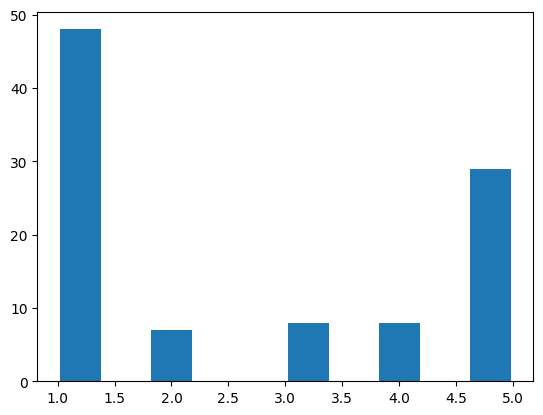

In [38]:
plt.hist(score_distribution, rwidth = 0.9)

In [39]:
df['Sentiment Scores'] = df['title'].apply(lambda title: sentiment_score(title, tokenizer, model))
mean_sentiment = df.groupby(['date']).mean(['Sentiment Scores'])
overall_sentiment_series = mean_sentiment.mean()
overall_sentiment = overall_sentiment_series.iloc[0]

In [40]:
print(overall_sentiment)

2.700728006568828


In [47]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

def web_scraper(input):
    finviz_url = "https://finviz.com/quote.ashx?t="
    ticker = input

    news_tables = {}

    url = finviz_url + ticker

    req = Request(url = url, headers = {'user-agent': 'mega-chonk'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table
        
    parsed_data = []

    for ticker, news_table in news_tables.items():
        for row in news_table.findAll('tr'):
            title = row.a.text
            date_data = row.td.text
            date_data = re.sub(r"\r\n", "", date_data)
            date_data = re.sub(r"\s+", " ", date_data)
            date_data = re.sub(r"^\s|\s$", "", date_data)
            date_data = date_data.split(" ")

            if date_data[0].lower() == 'today':
                date_data[0]= date.today()
                time = date_data[1]
            if len(date_data) == 1:
                time = date_data[0]
            else:
                date_article = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, date_article, time, title])

    # print(parsed_data)

    df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])
    return df

In [50]:
def Sentiment_Analysis2(df):
    tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
    model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
    df['date'] = pd.to_datetime(df['date']).dt.date

    df['Sentiment Scores'] = df['title'].apply(lambda title: sentiment_score(title, tokenizer, model))
    mean_sentiment = df.groupby(['date']).mean(['Sentiment Scores'])

    overall_sentiment_series = mean_sentiment.mean()
    overall_sentiment = overall_sentiment_series.iloc[0]
    return overall_sentiment

In [41]:
ticker_list = ['NVDA', 'MSFT', 'ORCL', 'TSM', 'AVGO', 'ASML', 'AMD', 'CRM', 'ADBE', 'AAPL',
               'JPM', 'BAC', 'WFC', 'AXP', 'BX', 'MS', 'HSBC', 'RY', 'MA', 'V',
               'LLY', 'NVO', 'UNH', 'JNJ', 'ABBV', 'MRK', 'TMO', 'AZN', 'ABT', 'NVS',
                'GE', 'CAT', 'UNP', 'UPS', 'HON',
                'AMZN', 'TSLA', 'HD', 'TM', 'MCD',
                'LIN', 'BHP', 'RIO', 'SHW', 'SCCO',
                'PLD', 'AMT', 'EQIX', 'SPG', 'WELL',
                'GOOGL', 'META', 'NFLX', 'DIS', 'TMUS',
                'XOM', 'CVX', 'SHEL', 'TTE', 'COP',
                'WMT', 'PG', 'COST', 'KO', 'PEP',
                'NEE', 'SO', 'DUK', 'CEG', 'NGG'
               ]

In [44]:
score_dis = pd.DataFrame({'Score': []})

In [51]:
for ticker in ticker_list:
    score = Sentiment_Analysis2(web_scraper(ticker))
    new_row = {'Score': score}
    score_dis.loc[len(score_dis)] = new_row

C:\Users\richa\AppData\Local\Temp\ipykernel_9988\1921624673.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date
C:\Users\richa\AppData\Local\Temp\ipykernel_9988\1921624673.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date
C:\Users\richa\AppData\Local\Temp\ipykernel_9988\1921624673.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date
C:\Users\richa\AppData\Local\Temp\ipykernel_9988\1921624673.py:4: UserWarning: Could not infer forma

In [52]:
score_dis.head()

,Score
0,3.597884
1,3.911401
2,3.643212
3,3.879084
4,4.130382


(array([ 1.,  0.,  4.,  1., 14., 12., 14., 18.,  7.,  4.]),
 array([2.34204721, 2.54937255, 2.75669788, 2.96402321, 3.17134855,
        3.37867388, 3.58599921, 3.79332455, 4.00064988, 4.20797521,
        4.41530055]),
 <BarContainer object of 10 artists>)

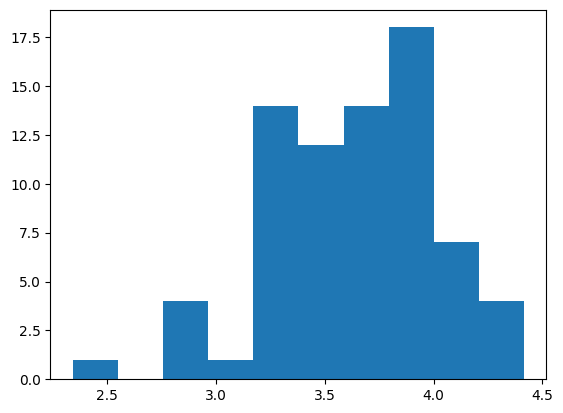

In [53]:
plt.hist(score_dis)

In [57]:
std_dev = score_dis.std()
mea = score_dis.mean()
median = score_dis.median()

print(score_dis.count())
print(median)
print(mea)
print(std_dev)

Score    75
dtype: int64
Score    3.643212
dtype: float64
Score    3.632343
dtype: float64
Score    0.384867
dtype: float64
